In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
#create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

602

In [6]:
#import the datetime module from the datetime library
from datetime import datetime

In [7]:
import requests

from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd0ae840d7f5e4f284eeda78f0811bc5


In [9]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in the list
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | groningen
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | winchester
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | karaul
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | oban
Processing Record 12 of Set 1 | ust-barguzin
Processing Record 13 of Set 1 | moose factory
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | mahibadhoo
Processing Record 16 of Set 1 | brae
Processing Record 17 of Set 1 | baiyin
Processing Record 18 of Set 1 | jorochito
Processing Record 19 of Set 1 | larreynaga
Processing Record 20 of Set 1 | nampa
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | mill valley
Proce

Processing Record 37 of Set 4 | muroto
Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 4 | porto belo
Processing Record 41 of Set 4 | husavik
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | hirado
Processing Record 45 of Set 4 | emerald
Processing Record 46 of Set 4 | asahikawa
Processing Record 47 of Set 4 | villa carlos paz
Processing Record 48 of Set 4 | bahia blanca
Processing Record 49 of Set 4 | warwick
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | souris
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | balikpapan
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | mazamari
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | mago
Processing Record 9 

Processing Record 30 of Set 8 | eregli
Processing Record 31 of Set 8 | beyneu
Processing Record 32 of Set 8 | karanganyar
Processing Record 33 of Set 8 | tingi
Processing Record 34 of Set 8 | villarrica
Processing Record 35 of Set 8 | atambua
Processing Record 36 of Set 8 | payo
Processing Record 37 of Set 8 | ous
Processing Record 38 of Set 8 | buala
Processing Record 39 of Set 8 | shemonaikha
Processing Record 40 of Set 8 | oksbol
Processing Record 41 of Set 8 | kulhudhuffushi
Processing Record 42 of Set 8 | port hawkesbury
Processing Record 43 of Set 8 | aykino
Processing Record 44 of Set 8 | qasigiannguit
Processing Record 45 of Set 8 | balkanabat
Processing Record 46 of Set 8 | hay river
Processing Record 47 of Set 8 | broken hill
Processing Record 48 of Set 8 | los llanos de aridane
Processing Record 49 of Set 8 | atsiki
City not found. Skipping...
Processing Record 50 of Set 8 | cabo san lucas
Processing Record 1 of Set 9 | gunnedah
Processing Record 2 of Set 9 | ramygala
Proces

Processing Record 13 of Set 12 | omsukchan
Processing Record 14 of Set 12 | machali
Processing Record 15 of Set 12 | marcona
City not found. Skipping...
Processing Record 16 of Set 12 | magadan
Processing Record 17 of Set 12 | maldonado
Processing Record 18 of Set 12 | tibacuy
Processing Record 19 of Set 12 | manvi
Processing Record 20 of Set 12 | zhigansk
Processing Record 21 of Set 12 | namibe
Processing Record 22 of Set 12 | port-cartier
Processing Record 23 of Set 12 | mount isa
Processing Record 24 of Set 12 | ampanihy
Processing Record 25 of Set 12 | upata
Processing Record 26 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 27 of Set 12 | labutta
City not found. Skipping...
Processing Record 28 of Set 12 | teacapan
Processing Record 29 of Set 12 | marakkanam
Processing Record 30 of Set 12 | puerto escondido
Processing Record 31 of Set 12 | gilgit
Processing Record 32 of Set 12 | khvoynaya
Processing Record 33 of Set 12 | jardim
Processing Record 34 of Se

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,52.43,77,77,7.43,UY,2021-10-09 02:26:20
1,Groningen,53.2500,6.7500,51.10,79,0,4.61,NL,2021-10-09 02:25:18
2,Mahebourg,-20.4081,57.7000,70.09,88,40,9.22,MU,2021-10-09 02:26:21
3,Kodiak,57.7900,-152.4072,51.31,50,1,11.50,US,2021-10-09 02:24:24
4,Winchester,51.0651,-1.3187,56.41,91,5,1.14,GB,2021-10-09 02:26:21
5,Kahului,20.8947,-156.4700,83.46,76,75,19.57,US,2021-10-09 02:24:05
6,Bathsheba,13.2167,-59.5167,81.21,83,40,17.27,BB,2021-10-09 02:24:34
7,Tuktoyaktuk,69.4541,-133.0374,30.20,93,90,4.61,CA,2021-10-09 02:23:39
8,Rikitea,-23.1203,-134.9692,74.28,78,100,10.51,PF,2021-10-09 02:24:04
9,Oban,56.4127,-5.4706,60.39,90,100,9.48,GB,2021-10-09 02:26:22


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2021-10-09 02:26:20,-33.6971,-53.4616,52.43,77,77,7.43
1,Groningen,NL,2021-10-09 02:25:18,53.2500,6.7500,51.10,79,0,4.61
2,Mahebourg,MU,2021-10-09 02:26:21,-20.4081,57.7000,70.09,88,40,9.22
3,Kodiak,US,2021-10-09 02:24:24,57.7900,-152.4072,51.31,50,1,11.50
4,Winchester,GB,2021-10-09 02:26:21,51.0651,-1.3187,56.41,91,5,1.14
5,Kahului,US,2021-10-09 02:24:05,20.8947,-156.4700,83.46,76,75,19.57
6,Bathsheba,BB,2021-10-09 02:24:34,13.2167,-59.5167,81.21,83,40,17.27
7,Tuktoyaktuk,CA,2021-10-09 02:23:39,69.4541,-133.0374,30.20,93,90,4.61
8,Rikitea,PF,2021-10-09 02:24:04,-23.1203,-134.9692,74.28,78,100,10.51
9,Oban,GB,2021-10-09 02:26:22,56.4127,-5.4706,60.39,90,100,9.48


In [14]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#extract relevant fields from the Dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

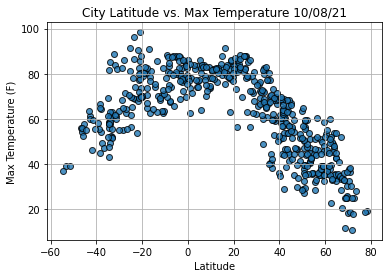

In [18]:
#import the time module
import time

#build the scatter plot for latitude vs  max temperature
plt.scatter(lats,
            max_temps, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

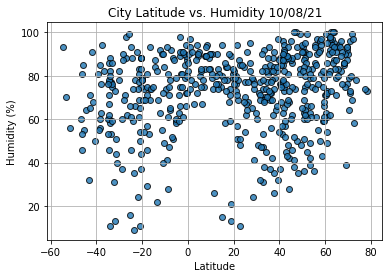

In [21]:
#import the time module
import time

#build the scatter plot for latitude vs  max temperature
plt.scatter(lats,
            humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

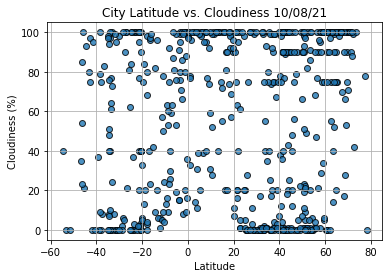

In [25]:
#import the time module
import time

#build the scatter plot for latitude vs  max temperature
plt.scatter(lats,
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

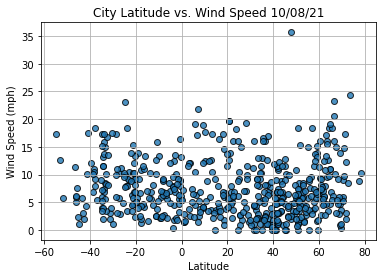

In [26]:
#import the time module
import time

#build the scatter plot for latitude vs  max temperature
plt.scatter(lats,
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()